In [1]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import numpy as np
import datetime

In [2]:
df = pd.read_csv('SUNPHARMA.csv')

df.isnull().sum()

Date                     0
Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                2850
Deliverable Volume     528
%Deliverble            528
dtype: int64

In [3]:
df['Date'] = pd.to_datetime(df['Date'])

In [4]:
df = df[df["Date"] >= "2019-01-01"]

In [5]:
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
4729,2019-01-01,SUNPHARMA,EQ,430.50,432.50,438.8,429.65,432.70,433.55,435.01,8487116,3.691997e+14,91786.0,1524951.0,0.1797
4730,2019-01-02,SUNPHARMA,EQ,433.55,430.50,441.2,429.25,439.95,440.05,435.70,9656878,4.207479e+14,100434.0,3755920.0,0.3889
4731,2019-01-03,SUNPHARMA,EQ,440.05,442.05,443.6,434.00,434.90,436.10,439.97,9479511,4.170669e+14,112961.0,2912917.0,0.3073
4732,2019-01-04,SUNPHARMA,EQ,436.10,439.10,439.9,432.20,433.40,433.80,435.62,6228693,2.713361e+14,81360.0,1392009.0,0.2235
4733,2019-01-07,SUNPHARMA,EQ,433.80,437.10,438.0,429.30,430.85,430.80,433.19,4118235,1.783964e+14,64152.0,1444774.0,0.3508


In [6]:
X = df[['Prev Close','Date','High','Low','Open']].values
y = df[['Close']].values

In [7]:
X.shape

(577, 5)

In [8]:
X=X.reshape(-1,5)

In [9]:
print(X.shape)

(577, 5)


In [10]:
print(y.shape)

(577, 1)


In [11]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [12]:
print(X_train)

[[429.05 Timestamp('2019-12-18 00:00:00') 441.4 427.3 430.0]
 [465.55 Timestamp('2019-04-12 00:00:00') 468.5 462.3 467.0]
 [564.35 Timestamp('2021-01-29 00:00:00') 600.0 554.1 568.0]
 ...
 [485.65 Timestamp('2020-06-18 00:00:00') 488.5 483.0 485.65]
 [394.65 Timestamp('2019-10-15 00:00:00') 400.0 392.25 397.2]
 [610.75 Timestamp('2021-04-05 00:00:00') 611.95 592.75 611.7]]


In [13]:
print(X_test)

[[416.75 Timestamp('2019-08-28 00:00:00') 421.7 411.5 416.9]
 [508.85 Timestamp('2020-09-23 00:00:00') 521.0 498.25 520.5]
 [447.8 Timestamp('2020-01-27 00:00:00') 451.75 442.2 447.0]
 [552.55 Timestamp('2020-12-22 00:00:00') 571.1 540.4 553.0]
 [463.9 Timestamp('2020-05-13 00:00:00') 469.45 450.2 469.0]
 [574.55 Timestamp('2021-03-19 00:00:00') 582.65 562.1 571.0]
 [419.45 Timestamp('2019-05-15 00:00:00') 424.5 407.1 420.0]
 [422.1 Timestamp('2019-11-11 00:00:00') 423.3 407.1 415.0]
 [473.4 Timestamp('2020-04-21 00:00:00') 490.7 464.25 467.85]
 [582.3 Timestamp('2020-12-08 00:00:00') 582.0 565.8 582.0]
 [502.2 Timestamp('2020-10-15 00:00:00') 504.7 489.0 504.7]
 [421.2 Timestamp('2019-05-23 00:00:00') 427.0 410.2 425.0]
 [646.05 Timestamp('2021-04-19 00:00:00') 651.4 635.0 644.0]
 [454.4 Timestamp('2020-05-07 00:00:00') 465.7 450.2 462.0]
 [469.7 Timestamp('2019-04-03 00:00:00') 473.9 459.15 471.0]
 [440.7 Timestamp('2020-05-19 00:00:00') 456.0 438.6 443.8]
 [604.45 Timestamp('2021-03

In [14]:
X_df = pd.DataFrame(X_train, columns=[['Prev Close','Date','High','Low','Open']])
y_df = pd.DataFrame(y_train, columns=['Close'])

In [15]:
print(X_df['Prev Close'])

    Prev Close
0       429.05
1       465.55
2       564.35
3       412.75
4        446.4
..         ...
456      414.6
457      444.4
458     485.65
459     394.65
460     610.75

[461 rows x 1 columns]


In [16]:
regressor=LinearRegression()
regressor.fit(X_df[['Prev Close','High','Low','Open']],y_df)

LinearRegression()

In [17]:
Xtest_df = pd.DataFrame(X_test, columns=[['Prev Close','Date','High','Low','Open']])

In [18]:
y_pred=regressor.predict(Xtest_df[['Prev Close','High','Low','Open']])

In [19]:
y_preddf = pd.DataFrame(y_pred,columns=['Close'])

In [20]:
r2_score(y_test,y_pred)

0.9974162661269989

In [21]:
print(Xtest_df)

    Prev Close       Date    High     Low    Open
0       416.75 2019-08-28   421.7   411.5   416.9
1       508.85 2020-09-23   521.0  498.25   520.5
2        447.8 2020-01-27  451.75   442.2   447.0
3       552.55 2020-12-22   571.1   540.4   553.0
4        463.9 2020-05-13  469.45   450.2   469.0
..         ...        ...     ...     ...     ...
111     399.25 2019-06-10   405.8  394.05   402.0
112     400.95 2019-07-01   406.5   401.5   402.0
113     449.85 2020-01-24  452.85   446.8   450.0
114      584.0 2020-12-31   594.9  582.05  584.65
115      523.1 2020-10-06   527.6   519.0   526.0

[116 rows x 5 columns]


In [22]:
print(y_test)

[[413.1 ]
 [502.9 ]
 [448.4 ]
 [568.3 ]
 [452.35]
 [578.3 ]
 [409.75]
 [421.45]
 [473.15]
 [568.7 ]
 [490.3 ]
 [412.95]
 [640.65]
 [452.2 ]
 [462.  ]
 [441.7 ]
 [614.2 ]
 [454.5 ]
 [602.3 ]
 [448.6 ]
 [624.35]
 [499.7 ]
 [431.05]
 [397.85]
 [434.95]
 [485.6 ]
 [511.75]
 [416.8 ]
 [485.55]
 [454.45]
 [479.95]
 [427.  ]
 [426.55]
 [440.7 ]
 [631.5 ]
 [386.05]
 [431.25]
 [520.8 ]
 [459.1 ]
 [429.7 ]
 [398.3 ]
 [429.9 ]
 [643.4 ]
 [506.15]
 [440.05]
 [440.  ]
 [474.5 ]
 [383.95]
 [472.95]
 [646.05]
 [541.05]
 [418.95]
 [485.8 ]
 [605.5 ]
 [522.3 ]
 [582.9 ]
 [417.  ]
 [525.1 ]
 [501.9 ]
 [456.35]
 [452.45]
 [475.5 ]
 [525.95]
 [436.7 ]
 [623.6 ]
 [437.95]
 [452.9 ]
 [584.75]
 [590.45]
 [412.  ]
 [564.35]
 [429.8 ]
 [430.65]
 [512.45]
 [366.8 ]
 [571.65]
 [414.6 ]
 [365.25]
 [565.2 ]
 [528.95]
 [463.15]
 [499.15]
 [423.  ]
 [531.35]
 [473.1 ]
 [460.55]
 [539.35]
 [604.05]
 [427.65]
 [375.95]
 [476.15]
 [479.25]
 [461.  ]
 [422.95]
 [415.05]
 [405.45]
 [513.25]
 [419.45]
 [493.2 ]
 [434.3 ]


In [23]:
print(y_pred)

[[416.29301745]
 [504.1812142 ]
 [446.62079039]
 [557.45525113]
 [455.48236746]
 [572.81403412]
 [414.11163071]
 [415.81031015]
 [482.82286774]
 [569.42906811]
 [492.79063726]
 [415.69049189]
 [641.87898471]
 [455.70309346]
 [464.21757625]
 [448.98700627]
 [609.7904994 ]
 [455.96197125]
 [602.64148633]
 [450.30965608]
 [618.74128638]
 [499.04293691]
 [433.17959876]
 [405.04026416]
 [438.62634554]
 [488.62209057]
 [515.72873425]
 [413.89829556]
 [489.57282884]
 [460.94401549]
 [477.44885475]
 [427.4974852 ]
 [432.51944098]
 [443.62308498]
 [632.95778923]
 [389.08382956]
 [434.23663405]
 [524.95930389]
 [452.80091893]
 [427.98168776]
 [402.57154363]
 [430.4465953 ]
 [642.10426586]
 [507.23731437]
 [437.43194986]
 [440.48133869]
 [475.17185906]
 [382.71960194]
 [473.49450982]
 [639.99804174]
 [538.93574625]
 [418.65160588]
 [489.73336784]
 [600.35480749]
 [525.11154982]
 [585.03519581]
 [419.07627168]
 [526.56461897]
 [506.2835648 ]
 [455.54068446]
 [450.61419861]
 [475.27616295]
 [526.85

In [24]:
# Xtest_df['Date'] = pd.to_datetime(Xtest_df['Date'])

In [25]:
print(Xtest_df)

    Prev Close       Date    High     Low    Open
0       416.75 2019-08-28   421.7   411.5   416.9
1       508.85 2020-09-23   521.0  498.25   520.5
2        447.8 2020-01-27  451.75   442.2   447.0
3       552.55 2020-12-22   571.1   540.4   553.0
4        463.9 2020-05-13  469.45   450.2   469.0
..         ...        ...     ...     ...     ...
111     399.25 2019-06-10   405.8  394.05   402.0
112     400.95 2019-07-01   406.5   401.5   402.0
113     449.85 2020-01-24  452.85   446.8   450.0
114      584.0 2020-12-31   594.9  582.05  584.65
115      523.1 2020-10-06   527.6   519.0   526.0

[116 rows x 5 columns]


In [26]:
Xtest_df.iloc[:,1:2]

,Date
0,2019-08-28
1,2020-09-23
2,2020-01-27
3,2020-12-22
4,2020-05-13
...,...
111,2019-06-10
112,2019-07-01
113,2020-01-24
114,2020-12-31


In [27]:
X_plot = Xtest_df.iloc[:,1:2]
X_plotdf = pd.DataFrame(X_plot,columns = [('Date',)])

In [28]:
for col in X_plot:
    print(col)

('Date',)


In [29]:
y_testdf = pd.DataFrame(y_test,columns=['Close'])

In [30]:
print(X_plotdf)

          Date
0   2019-08-28
1   2020-09-23
2   2020-01-27
3   2020-12-22
4   2020-05-13
..         ...
111 2019-06-10
112 2019-07-01
113 2020-01-24
114 2020-12-31
115 2020-10-06

[116 rows x 1 columns]


In [31]:

print(X_plotdf.shape)
print(y_testdf.shape)

(116, 1)
(116, 1)


In [32]:
new_df = pd.merge(X_plotdf, y_preddf, left_index=True, right_index=True)

In [33]:
old_df = pd.merge(X_plotdf, y_testdf, left_index=True, right_index=True)

In [34]:
new_df = new_df.rename(columns = {('Date',):'Date'})
old_df = old_df.rename(columns = {('Date',):'Date'})
new_df = new_df.rename(columns={('Close'):'Predicted Price'})
old_df = old_df.rename(columns={('Close'):'Actual Price'})

In [35]:
print(new_df)

          Date  Predicted Price
0   2019-08-28       416.293017
1   2020-09-23       504.181214
2   2020-01-27       446.620790
3   2020-12-22       557.455251
4   2020-05-13       455.482367
..         ...              ...
111 2019-06-10       398.874722
112 2019-07-01       404.474751
113 2020-01-24       449.115676
114 2020-12-31       589.315016
115 2020-10-06       521.046742

[116 rows x 2 columns]


In [36]:
for col in old_df:
    print(col)

Date
Actual Price


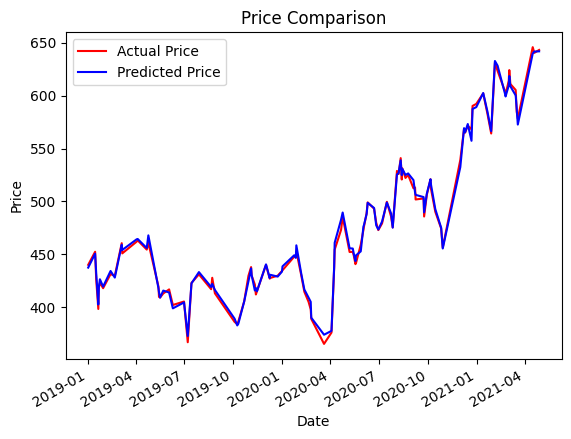

In [37]:
old_df.set_index('Date', inplace=True)
new_df.set_index('Date',inplace=True)
ax = old_df.plot(color='red')
new_df.plot(ax=ax,color='blue')
plt.title('Price Comparison')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()